Step 1 Import Libraries and Download Datasets

In [3]:
!pip install gdown -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O fear_greed_index.csv
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O historical_data.csv

sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

print("Datasets loaded successfully.")
trader_df.head()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100% 90.8k/90.8k [00:00<00:00, 103MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_data.csv
100% 47.5M/47.5M [00:00<00:00, 86.8MB/s]
Datasets loaded successfully.


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Step 2 Preprocess and Merge

In [4]:
print("\nProcessing and merging data...")
# Process the sentiment data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_map = {'Extreme Fear': -2, 'Fear': -1, 'Neutral': 0, 'Greed': 1, 'Extreme Greed': 2}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)

# Process the trader data
trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], format='%d-%m-%Y %H:%M')
trader_df['date'] = pd.to_datetime(trader_df['timestamp_ist'].dt.date)

# Aggregate trader data into daily metrics
trader_df['signed_volume'] = trader_df.apply(lambda row: row['size_usd'] if row['side'] == 'BUY' else -row['size_usd'], axis=1)
daily_agg = trader_df.groupby('date').agg(
    total_volume_usd=('size_usd', 'sum'),
    net_volume_usd=('signed_volume', 'sum'),
    total_pnl=('closed_pnl', 'sum'),
    trade_count=('account', 'count')
)

# Merge the two datasets
df_merged = pd.merge(sentiment_df, daily_agg, on='date', how='inner')
print("Data Processing and Merging Complete.")




Processing and merging data...
Data Processing and Merging Complete.


Step 3 Analysis and Visualisation


Generating analysis and visualizations...

--- Average Daily Behavior by Sentiment ---
                total_volume_usd     total_pnl  net_volume_usd
classification                                                
Extreme Fear        8.177447e+06  52793.589178  -114443.007143
Extreme Greed       1.091800e+06  23817.292199   -33328.776754
Fear                5.311261e+06  36891.818040   113831.894835
Greed               1.495246e+06  11140.566181   110850.495751
Neutral             2.690180e+06  19297.323516  -492374.832537


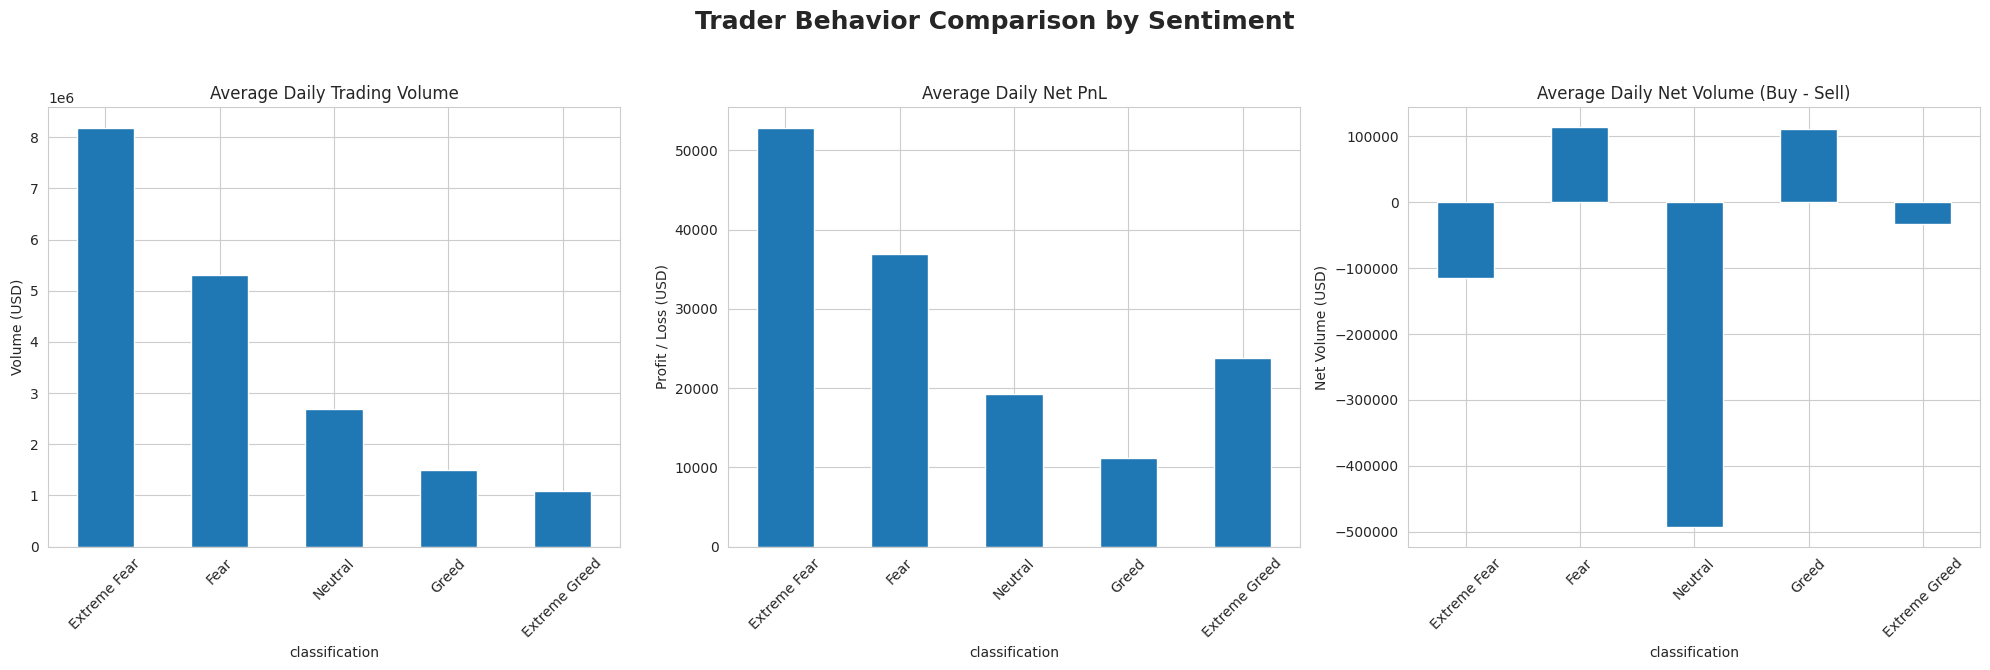

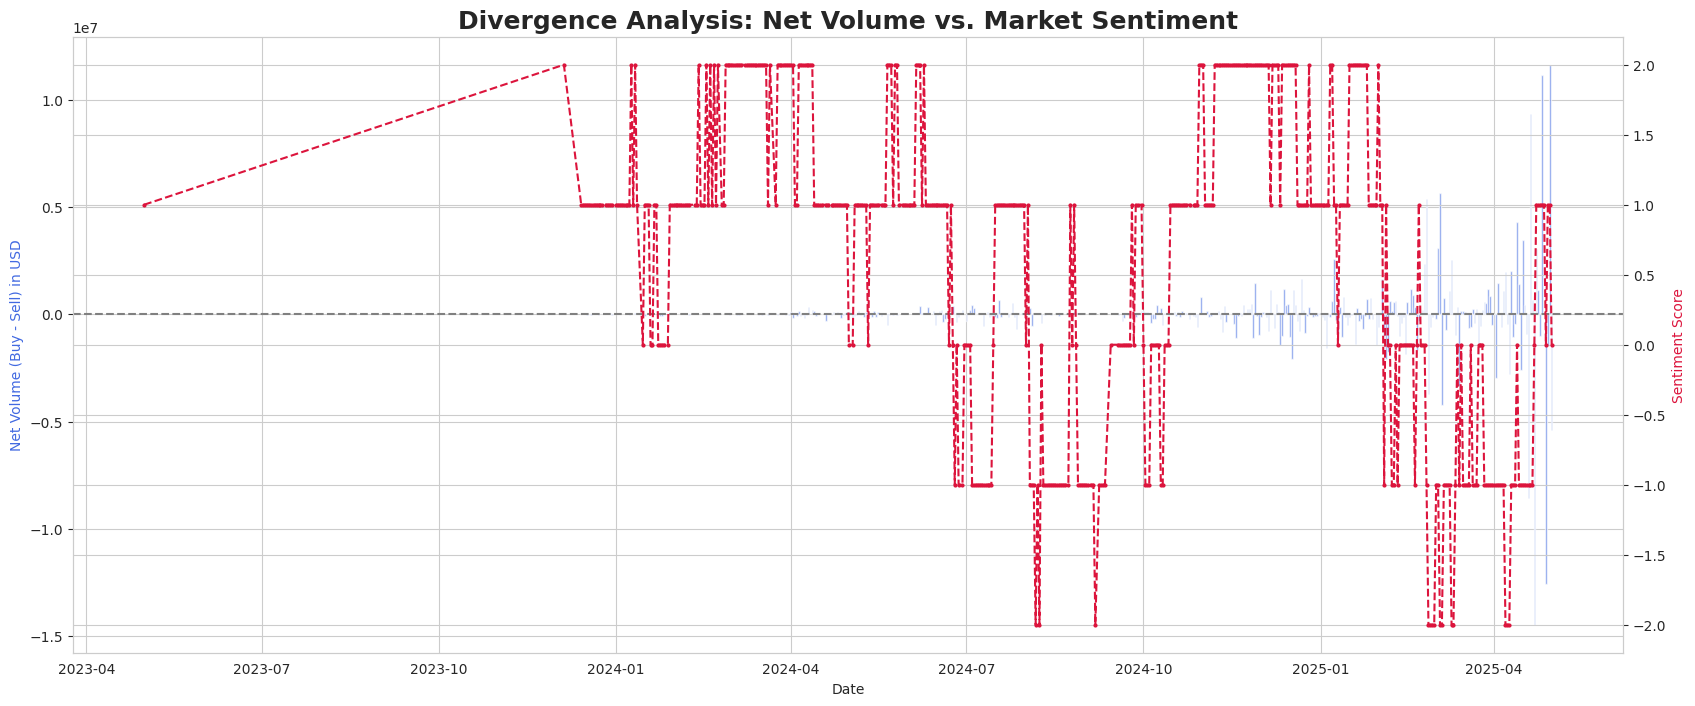


--- Analysis Complete ---


In [5]:
print("\nGenerating analysis and visualizations...")

# --- Insight 1: Behavior by Sentiment ---
behavior_summary = df_merged.groupby('classification')[[
    'total_volume_usd', 'total_pnl', 'net_volume_usd'
]].mean()

print("\n--- Average Daily Behavior by Sentiment ---")
print(behavior_summary)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Trader Behavior Comparison by Sentiment', fontsize=18, weight='bold')
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

behavior_summary.reindex(order)['total_volume_usd'].plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Average Daily Trading Volume')
axes[0].set_ylabel('Volume (USD)')

behavior_summary.reindex(order)['total_pnl'].plot(kind='bar', ax=axes[1], rot=45)
axes[1].set_title('Average Daily Net PnL')
axes[1].set_ylabel('Profit / Loss (USD)')

behavior_summary.reindex(order)['net_volume_usd'].plot(kind='bar', ax=axes[2], rot=45)
axes[2].set_title('Average Daily Net Volume (Buy - Sell)')
axes[2].set_ylabel('Net Volume (USD)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Insight 2: Divergence Analysis Over Time ---
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.title('Divergence Analysis: Net Volume vs. Market Sentiment', fontsize=18, weight='bold')

ax1.set_xlabel('Date')
ax1.set_ylabel('Net Volume (Buy - Sell) in USD', color='royalblue')
ax1.bar(df_merged['date'], df_merged['net_volume_usd'], color='royalblue', alpha=0.7)
ax1.axhline(0, color='gray', linestyle='--')

ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='crimson')
ax2.plot(df_merged['date'], df_merged['sentiment_score'], color='crimson', linestyle='--', marker='.', markersize=4)
plt.show()

print("\n--- Analysis Complete ---")